# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | bethel


Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | ashgabat
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | emerald
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | bento goncalves
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | bazar-korgon
Processing Record 14 of Set 1 | belomorsk
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 18 of Set 1 | san juanito
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | philadelphia
Processing Record 22 of Set 1 | tura
Processing Record 23 of Set 1 | kapa'a
Processing Record 24 of Set 1 | lebu
Processing Record 25 of Set 1 | ahau
Ci

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,46,12.98,SH,1707012125
1,bethel,41.3712,-73.4140,1.68,63,10,3.33,US,1707012037
2,vadso,70.0744,29.7487,-1.91,80,100,5.14,NO,1707012125
3,akureyri,65.6835,-18.0878,-6.04,93,100,1.03,IS,1707012125
4,ashgabat,37.9500,58.3833,0.92,86,0,2.06,TM,1707011944


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,46,12.98,SH,1707012125
1,bethel,41.3712,-73.4140,1.68,63,10,3.33,US,1707012037
2,vadso,70.0744,29.7487,-1.91,80,100,5.14,NO,1707012125
3,akureyri,65.6835,-18.0878,-6.04,93,100,1.03,IS,1707012125
4,ashgabat,37.9500,58.3833,0.92,86,0,2.06,TM,1707011944


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

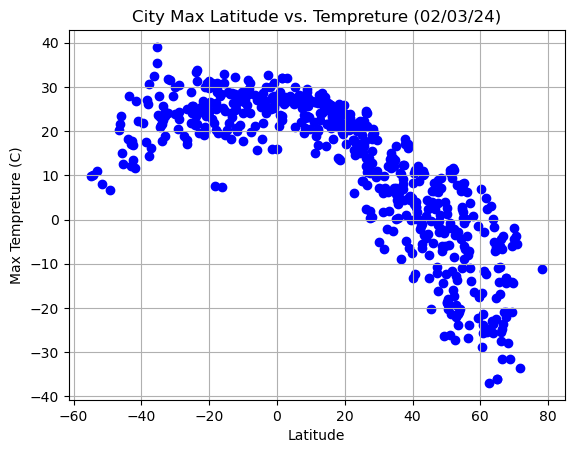

In [18]:
# Lat v Temp variables
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat, max_temp, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Tempreture ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

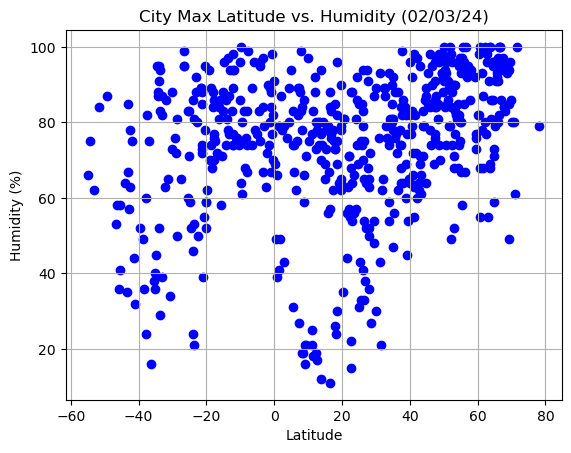

In [19]:
# Lat v Hum variables
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, humidity, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

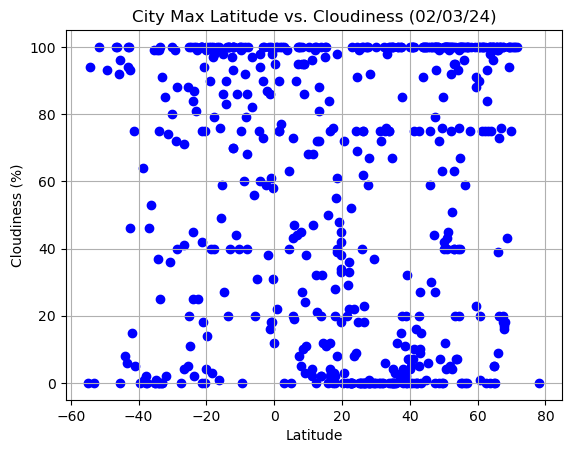

In [20]:
# Lat v Clouds variables
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, cloudiness, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

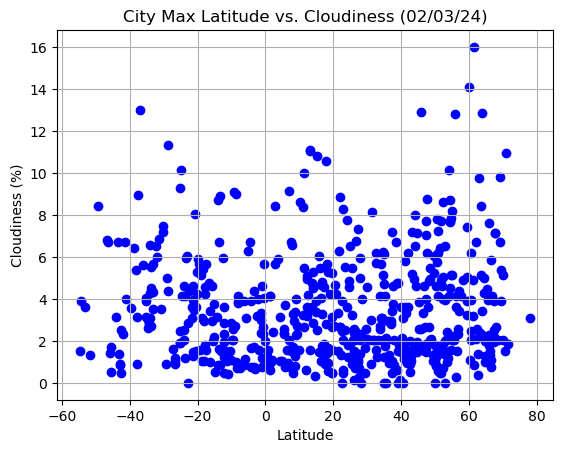

In [21]:
# Lat v Wind variables
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, wind_speed, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    plt.show()

In [112]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,1.68,63,10,3.33,US,1707012037
2,vadso,70.0744,29.7487,-1.91,80,100,5.14,NO,1707012125
3,akureyri,65.6835,-18.0878,-6.04,93,100,1.03,IS,1707012125
4,ashgabat,37.9500,58.3833,0.92,86,0,2.06,TM,1707011944
11,kingston,17.9970,-76.7936,25.53,73,20,1.54,JM,1707012044


In [113]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.22,75,46,12.98,SH,1707012125
5,adamstown,-25.0660,-130.1015,25.59,71,100,1.89,PN,1707012125
6,invercargill,-46.4000,168.3500,21.68,58,100,6.71,NZ,1707012126
7,saint-pierre,-21.3393,55.4781,20.82,73,0,3.60,RE,1707012126
8,emerald,-23.5333,148.1667,31.30,53,87,5.94,AU,1707012126


###  Temperature vs. Latitude Linear Regression Plot

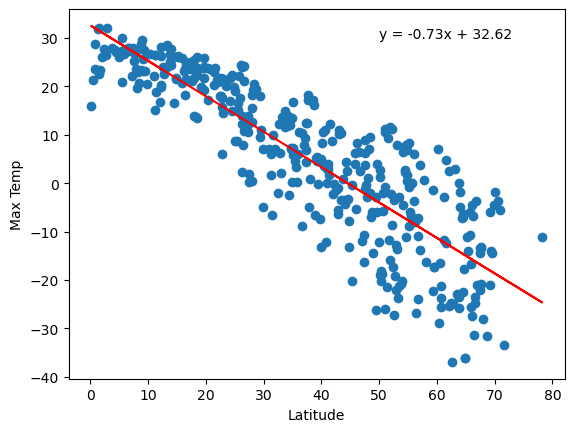

In [114]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_val, y_val,(50, 30))

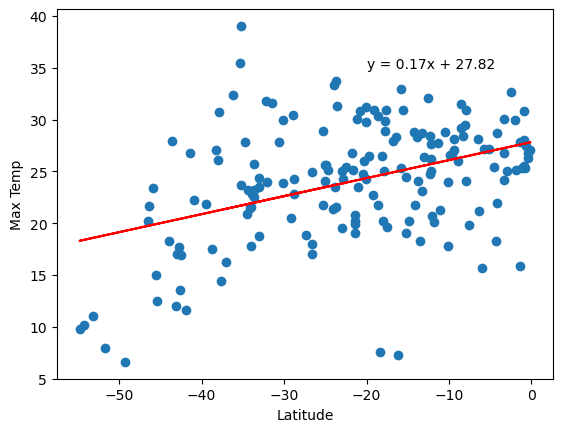

In [115]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_val, y_val,(-20, 35))

**Discussion about the linear relationship:** The closer to the equator the warmer the temperature.

### Humidity vs. Latitude Linear Regression Plot

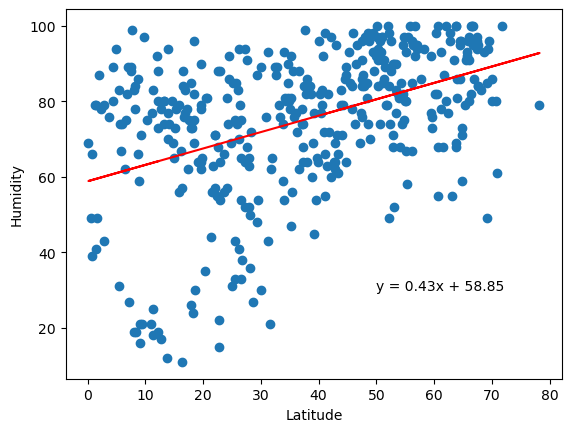

In [116]:
# new function definition
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    plt.show()

# Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Humidity"]
plot_linear_regression(x_val, y_val,(50, 30))

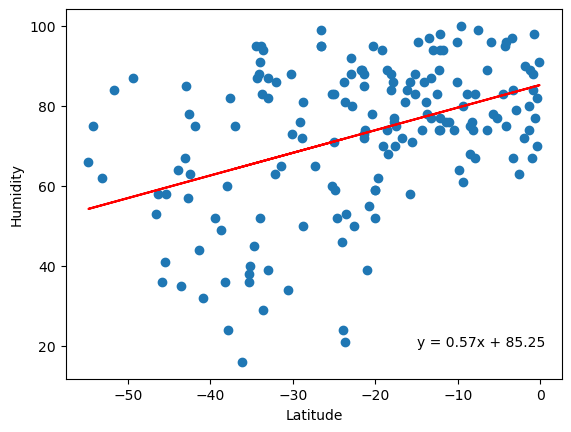

In [118]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Humidity"]
plot_linear_regression(x_val, y_val,(-15, 20))

**Discussion about the linear relationship:** The relative humidity is higher nearer the equator.

### Cloudiness vs. Latitude Linear Regression Plot

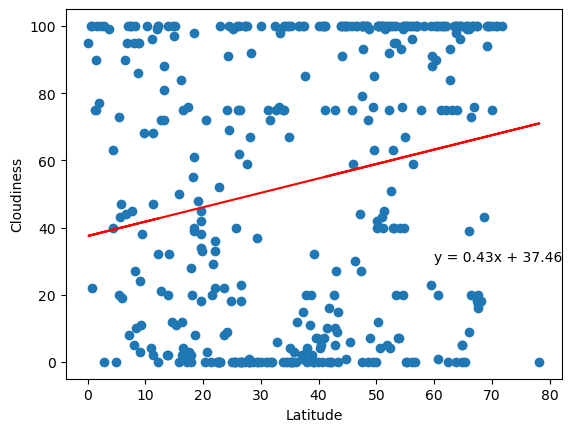

In [122]:
# new function definition
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.show()

# Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_val, y_val,(60, 30))

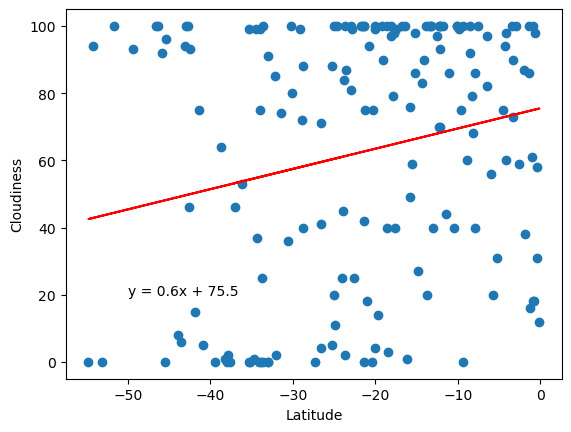

In [121]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_val, y_val,(-50, 20))

**Discussion about the linear relationship:** Proximity to the equator doesn't necessarily mean it will be cloudier.

### Wind Speed vs. Latitude Linear Regression Plot

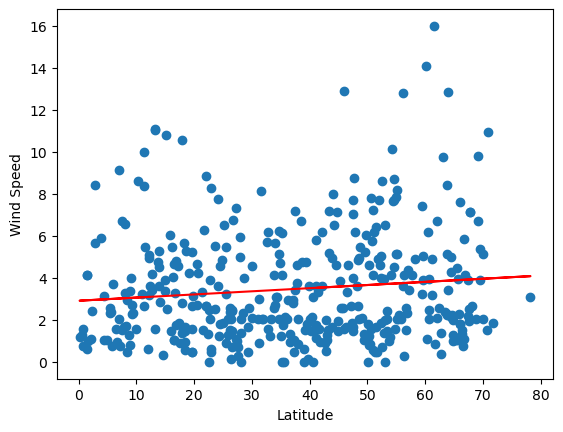

In [125]:
# new function definition
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    plt.show()

# Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_val, y_val,(60, 30))

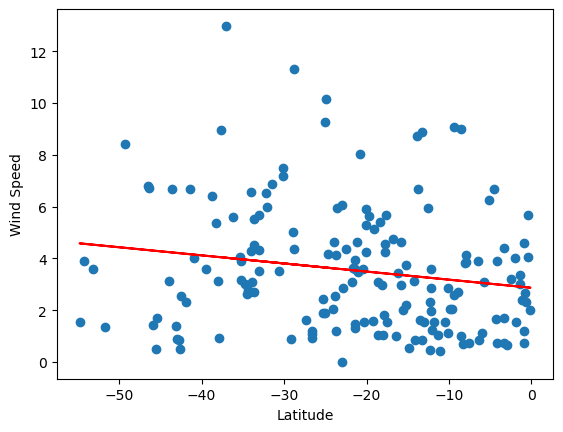

In [126]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_val, y_val,(-50, 20))

**Discussion about the linear relationship:** Proximity to the equator does not seem to equate to higher wind speed.